In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Install rdkit and conda**

Install rdkit and conda to help us calculate the Lipinski descriptors. **RDKit** is a collection of cheminformatics and machine-learning software written in C++ and Python. 


Conda is an **open-source, cross-platform,language-agnostic package manager** and environment management system. It was originally developed to solve **difficult package management** challenges faced by Python data scientists, and today is a popular package manager for Python and R

In [2]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-06-07 08:35:08--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   160MB/s    in 0.5s    

2021-06-07 08:35:08 (160 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

# **Load Data**

Load **rat_acetylcholinesterase_03_bioactivity_data_curated.csv** data

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Preprocessed Data/rat/rat_acetylcholinesterase_03_bioactivity_data_curated.csv")
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],100000.00,inactive
1,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],200000.00,inactive
2,CHEMBL15795,C[N+](C)(C)CCCCl.[Br-],260000.00,inactive
3,CHEMBL276539,BrCCCCCC[n+]1ccccc1.[Br-],60000.00,inactive
4,CHEMBL278956,CC[N+](C)(CC)CCc1ccncc1.[I-],200000.00,inactive
...,...,...,...,...
1443,CHEMBL4552250,CN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(C)Cc2ccc...,5600.00,intermediate
1444,CHEMBL4520323,CCN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(CC)Cc2c...,4600.00,intermediate
1445,CHEMBL4475678,COc1ccccc1CN(C)CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCC...,10600.00,inactive
1446,CHEMBL4451935,CCN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(CC)Cc2c...,1680.00,intermediate


Change the column **"canonical_smiles"** to the last column

In [5]:
df_drop_smiles = df.drop(columns='canonical_smiles')

In [6]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [7]:
df_chgcolumn_smiles = pd.concat([df_drop_smiles,smiles], axis=1)
df_chgcolumn_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL15886,100000.00,inactive,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O
1,CHEMBL556129,200000.00,inactive,C[n+]1ccccc1CCC(O)CCl
2,CHEMBL15795,260000.00,inactive,C[N+](C)(C)CCCCl
3,CHEMBL276539,60000.00,inactive,BrCCCCCC[n+]1ccccc1
4,CHEMBL278956,200000.00,inactive,CC[N+](C)(CC)CCc1ccncc1
...,...,...,...,...
1443,CHEMBL4552250,5600.00,intermediate,CN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(C)Cc2ccc...
1444,CHEMBL4520323,4600.00,intermediate,CCN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(CC)Cc2c...
1445,CHEMBL4475678,10600.00,inactive,COc1ccccc1CN(C)CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCC...
1446,CHEMBL4451935,1680.00,intermediate,CCN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(CC)Cc2c...


# **Calculate Lipinski descriptors**

Lipinski's rule of five, also known as Pfizer's rule of five or simply the rule of five (RO5), is a rule of thumb to evaluate **druglikeness** or determine if a chemical compound with a certain **pharmacological** or **biological activity** has chemical properties and physical properties that would make it a likely **orally active drug** in humans. 

The Lipinski's Rule stated the following:
*   Molecular weight must be < 500 daltons
*   Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

**Import required libraries**

In [8]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

**Calculate descriptors**

In [9]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [10]:
df_lipinski = lipinski(df_chgcolumn_smiles.canonical_smiles)

# **Concatenate the dataframe namely df with df_lipinski.**

In [11]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,255.338,0.5810,0.0,3.0
1,200.689,1.0434,1.0,1.0
2,136.646,1.3215,0.0,0.0
3,243.168,2.9294,0.0,0.0
4,193.314,2.1105,0.0,1.0
...,...,...,...,...
1443,602.820,5.9422,4.0,6.0
1444,630.874,6.7224,4.0,6.0
1445,662.872,5.9594,4.0,8.0
1446,690.926,6.7396,4.0,8.0


In [12]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],100000.00,inactive
1,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],200000.00,inactive
2,CHEMBL15795,C[N+](C)(C)CCCCl.[Br-],260000.00,inactive
3,CHEMBL276539,BrCCCCCC[n+]1ccccc1.[Br-],60000.00,inactive
4,CHEMBL278956,CC[N+](C)(CC)CCc1ccncc1.[I-],200000.00,inactive
...,...,...,...,...
1443,CHEMBL4552250,CN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(C)Cc2ccc...,5600.00,intermediate
1444,CHEMBL4520323,CCN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(CC)Cc2c...,4600.00,intermediate
1445,CHEMBL4475678,COc1ccccc1CN(C)CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCC...,10600.00,inactive
1446,CHEMBL4451935,CCN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(CC)Cc2c...,1680.00,intermediate


Concatenate the 2 dataframes, **df** and **df_lipinski**

In [13]:
df_concatenate = pd.concat([df,df_lipinski], axis=1)
df_concatenate

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],100000.00,inactive,255.338,0.5810,0.0,3.0
1,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],200000.00,inactive,200.689,1.0434,1.0,1.0
2,CHEMBL15795,C[N+](C)(C)CCCCl.[Br-],260000.00,inactive,136.646,1.3215,0.0,0.0
3,CHEMBL276539,BrCCCCCC[n+]1ccccc1.[Br-],60000.00,inactive,243.168,2.9294,0.0,0.0
4,CHEMBL278956,CC[N+](C)(CC)CCc1ccncc1.[I-],200000.00,inactive,193.314,2.1105,0.0,1.0
...,...,...,...,...,...,...,...,...
1443,CHEMBL4552250,CN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(C)Cc2ccc...,5600.00,intermediate,602.820,5.9422,4.0,6.0
1444,CHEMBL4520323,CCN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(CC)Cc2c...,4600.00,intermediate,630.874,6.7224,4.0,6.0
1445,CHEMBL4475678,COc1ccccc1CN(C)CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCC...,10600.00,inactive,662.872,5.9594,4.0,8.0
1446,CHEMBL4451935,CCN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(CC)Cc2c...,1680.00,intermediate,690.926,6.7396,4.0,8.0


# **Convert IC50 to pIC50**

IC50 is a measure of the potency of a substance in inhibiting a specific biological or biochemical function. IC50 is a quantitative measure that indicates how much of a particular inhibitory substance (e.g. drug) is needed to inhibit, in vitro, a given biological process or biological component by 50%

We will convert IC50 to the negative logarithmic scale which is essentially **-log10(IC50)**, to allow the data to be more uniformly distributed

In [14]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_normalize']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_normalize', 1)
        
    return x

In [15]:
df_concatenate.standard_value.describe()

count    1.448000e+03
mean     1.616748e+05
std      1.690303e+06
min      7.000000e-02
25%      9.775000e+01
50%      1.195000e+03
75%      1.302500e+04
max      4.830000e+07
Name: standard_value, dtype: float64

Normalize the value in the **standard_value** column

In [16]:
def normalize_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_normalize'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [17]:
df_normalize = normalize_value(df_concatenate)
df_normalize

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_normalize
0,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],inactive,255.338,0.5810,0.0,3.0,100000.00
1,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],inactive,200.689,1.0434,1.0,1.0,200000.00
2,CHEMBL15795,C[N+](C)(C)CCCCl.[Br-],inactive,136.646,1.3215,0.0,0.0,260000.00
3,CHEMBL276539,BrCCCCCC[n+]1ccccc1.[Br-],inactive,243.168,2.9294,0.0,0.0,60000.00
4,CHEMBL278956,CC[N+](C)(CC)CCc1ccncc1.[I-],inactive,193.314,2.1105,0.0,1.0,200000.00
...,...,...,...,...,...,...,...,...
1443,CHEMBL4552250,CN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(C)Cc2ccc...,intermediate,602.820,5.9422,4.0,6.0,5600.00
1444,CHEMBL4520323,CCN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(CC)Cc2c...,intermediate,630.874,6.7224,4.0,6.0,4600.00
1445,CHEMBL4475678,COc1ccccc1CN(C)CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCC...,inactive,662.872,5.9594,4.0,8.0,10600.00
1446,CHEMBL4451935,CCN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(CC)Cc2c...,intermediate,690.926,6.7396,4.0,8.0,1680.00


In [18]:
df_normalize.standard_value_normalize.describe()

count    1.448000e+03
mean     1.616748e+05
std      1.690303e+06
min      7.000000e-02
25%      9.775000e+01
50%      1.195000e+03
75%      1.302500e+04
max      4.830000e+07
Name: standard_value_normalize, dtype: float64

In [19]:
df_final = pIC50(df_normalize)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],inactive,255.338,0.5810,0.0,3.0,4.000000
1,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],inactive,200.689,1.0434,1.0,1.0,3.698970
2,CHEMBL15795,C[N+](C)(C)CCCCl.[Br-],inactive,136.646,1.3215,0.0,0.0,3.585027
3,CHEMBL276539,BrCCCCCC[n+]1ccccc1.[Br-],inactive,243.168,2.9294,0.0,0.0,4.221849
4,CHEMBL278956,CC[N+](C)(CC)CCc1ccncc1.[I-],inactive,193.314,2.1105,0.0,1.0,3.698970
...,...,...,...,...,...,...,...,...
1443,CHEMBL4552250,CN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(C)Cc2ccc...,intermediate,602.820,5.9422,4.0,6.0,5.251812
1444,CHEMBL4520323,CCN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(CC)Cc2c...,intermediate,630.874,6.7224,4.0,6.0,5.337242
1445,CHEMBL4475678,COc1ccccc1CN(C)CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCC...,inactive,662.872,5.9594,4.0,8.0,4.974694
1446,CHEMBL4451935,CCN(CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCCCCN(CC)Cc2c...,intermediate,690.926,6.7396,4.0,8.0,5.774691


In [20]:
df_final.pIC50.describe()

count    1448.000000
mean        5.947089
std         1.418605
min         1.316053
25%         4.885225
50%         5.922636
75%         7.009888
max        10.154902
Name: pIC50, dtype: float64

In [21]:
df_final.to_csv('rat_acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

# Remove "Intermediate" class

In [22]:
df_rmv_intermediate_class = df_final[df_final['class'] != 'intermediate']
df_rmv_intermediate_class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],inactive,255.338,0.5810,0.0,3.0,4.000000
1,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],inactive,200.689,1.0434,1.0,1.0,3.698970
2,CHEMBL15795,C[N+](C)(C)CCCCl.[Br-],inactive,136.646,1.3215,0.0,0.0,3.585027
3,CHEMBL276539,BrCCCCCC[n+]1ccccc1.[Br-],inactive,243.168,2.9294,0.0,0.0,4.221849
4,CHEMBL278956,CC[N+](C)(CC)CCc1ccncc1.[I-],inactive,193.314,2.1105,0.0,1.0,3.698970
...,...,...,...,...,...,...,...,...
1439,CHEMBL4553651,CCN(CCCCNC(=O)c1cc(O)c(C(=O)NCCCCN(CC)Cc2ccccc...,active,634.818,5.1792,4.0,8.0,6.251812
1441,CHEMBL4463164,CCN(CCCCNC(=O)c1cc(O)c(C(=O)NCCCCN(CC)Cc2ccc(N...,inactive,660.904,5.2940,4.0,8.0,4.562249
1442,CHEMBL4467746,O=C(NCCCCN1CCOc2ccccc2C1)c1cc(O)c(C(=O)NCCCCN2...,inactive,602.732,3.9070,4.0,8.0,4.511449
1445,CHEMBL4475678,COc1ccccc1CN(C)CCCCCCNC(=O)c1cc(O)c(C(=O)NCCCC...,inactive,662.872,5.9594,4.0,8.0,4.974694


Write this to csv file

In [23]:
df_rmv_intermediate_class.to_csv('rat_acetylcholinesterase_05_bioactivity_class_pIC50.csv')

# **Exploratory Data Analysis**

Import matplotlib and seaborn to plot graphs

In [24]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Plot the **bioactivity class** and the **number for each class**

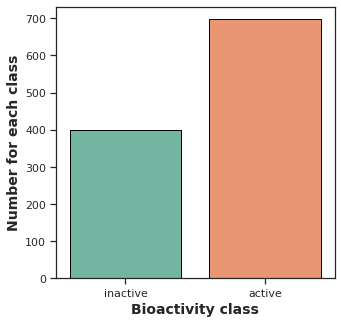

In [25]:
plt.figure(figsize=(5.0, 5.0))

sns.countplot(x='class', data=df_rmv_intermediate_class, edgecolor='black', palette="Set2")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Number for each class', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

Scatter plot of **Molecular Weight** and **LogP**

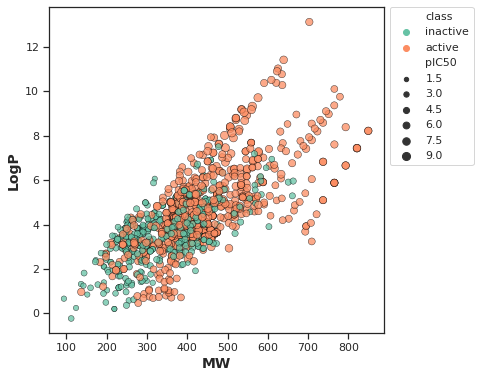

In [26]:
plt.figure(figsize=(6.0, 6.0))

sns.scatterplot(x='MW', y='LogP', data=df_rmv_intermediate_class, hue='class', size='pIC50', edgecolor='black', alpha=0.75,palette="Set2")

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf', bbox_inches = 'tight')

Box Plot for **pIC50 value** vs **bioactivity class**

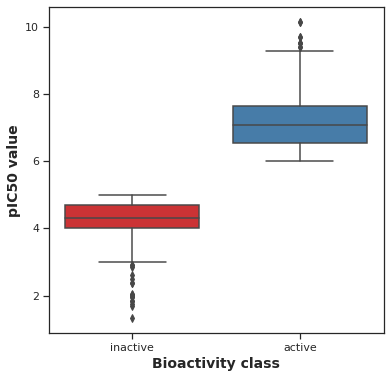

In [27]:
plt.figure(figsize=(6.0, 6.0))

sns.boxplot(x = 'class', y = 'pIC50', data = df_rmv_intermediate_class, palette="Set1")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Statistical analysis

In [28]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_rmv_intermediate_class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_rmv_intermediate_class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [29]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,5.155665e-168,0.05,Different distribution (reject H0)


Molecular Weight

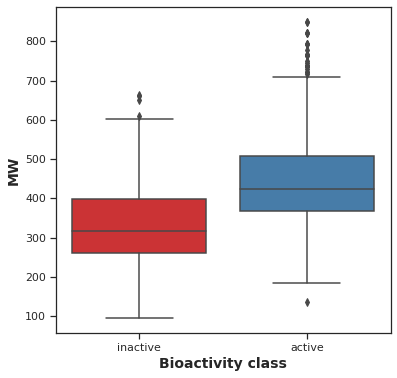

In [30]:
plt.figure(figsize=(6.0, 6.0))

sns.boxplot(x = 'class', y = 'MW', data = df_rmv_intermediate_class,palette="Set1")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [31]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,66048.0,4.339651e-48,0.05,Different distribution (reject H0)


LogP

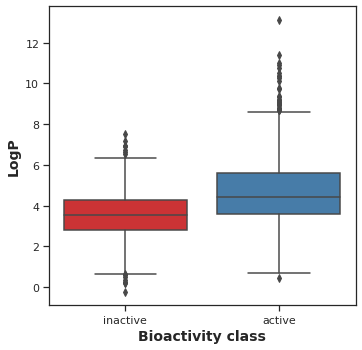

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_rmv_intermediate_class, palette="Set1")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [33]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,82889.5,2.323207e-29,0.05,Different distribution (reject H0)


NumHDonors

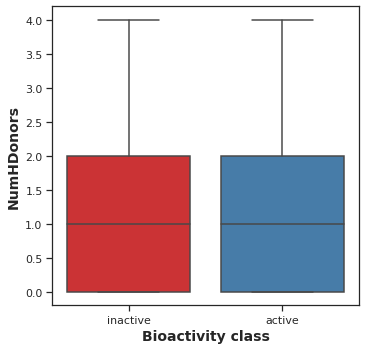

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_rmv_intermediate_class,palette="Set1")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [35]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,124621.5,0.001006,0.05,Different distribution (reject H0)


NumHAcceptors

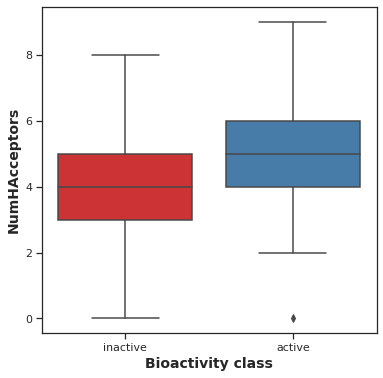

In [36]:
plt.figure(figsize=(6.0, 6.0))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_rmv_intermediate_class, palette="Set1")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [37]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,91007.0,1.094553e-22,0.05,Different distribution (reject H0)


# Find the statistical details for **active** and **inactive** class

In [39]:
df_rmv_active_class = df_rmv_intermediate_class[df_rmv_intermediate_class['class'] != 'active']
df_rmv_active_class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],inactive,255.338,0.5810,0.0,3.0,4.000000
1,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],inactive,200.689,1.0434,1.0,1.0,3.698970
2,CHEMBL15795,C[N+](C)(C)CCCCl.[Br-],inactive,136.646,1.3215,0.0,0.0,3.585027
3,CHEMBL276539,BrCCCCCC[n+]1ccccc1.[Br-],inactive,243.168,2.9294,0.0,0.0,4.221849
4,CHEMBL278956,CC[N+](C)(CC)CCc1ccncc1.[I-],inactive,193.314,2.1105,0.0,1.0,3.698970
...,...,...,...,...,...,...,...,...
1431,CHEMBL4464247,O=C(O)c1cc(O)c(C(=O)O)cc1O,inactive,198.130,0.4942,4.0,4.0,4.000000
1432,CHEMBL4524631,CN(CCCNC(=O)c1cc(O)c(C(=O)NCCCN(C)Cc2ccccc2)cc...,inactive,518.658,3.6016,4.0,6.0,4.946922
1441,CHEMBL4463164,CCN(CCCCNC(=O)c1cc(O)c(C(=O)NCCCCN(CC)Cc2ccc(N...,inactive,660.904,5.2940,4.0,8.0,4.562249
1442,CHEMBL4467746,O=C(NCCCCN1CCOc2ccccc2C1)c1cc(O)c(C(=O)NCCCCN2...,inactive,602.732,3.9070,4.0,8.0,4.511449


In [40]:
df_rmv_active_class.describe()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,335.395943,3.537807,1.030000,3.882500,4.213007
std,98.156428,1.305292,0.908936,1.911237,0.654976
min,94.117000,-0.227800,0.000000,0.000000,1.316053
25%,262.093500,2.817600,0.000000,3.000000,4.000000
50%,315.924000,3.537350,1.000000,4.000000,4.313188
75%,399.399000,4.264975,2.000000,5.000000,4.698970
max,662.872000,7.505500,4.000000,8.000000,5.000000


In [41]:
df_rmv_inactive_class = df_rmv_intermediate_class[df_rmv_intermediate_class['class'] != 'inactive']
df_rmv_inactive_class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
19,CHEMBL50309,Nc1c2c(nc3cc(F)ccc13)CCCC2O,active,232.258,2.3258,2.0,3.0,6.534617
29,CHEMBL298154,OC1CCCc2nc3cc(Cl)ccc3c(NCc3ccc(F)cc3)c21,active,356.828,5.0091,2.0,3.0,6.084600
43,CHEMBL298577,Nc1c2c(nc3cc(Cl)ccc13)CCCC2O,active,248.713,2.8401,2.0,3.0,7.931814
49,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,active,198.269,2.6958,1.0,2.0,6.496209
55,CHEMBL60167,Nc1c2c(nc3ccccc13)-c1ccccc1C2,active,232.286,3.3882,1.0,2.0,6.318759
...,...,...,...,...,...,...,...,...
1427,CHEMBL140476,CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2,active,284.790,4.4664,1.0,2.0,7.074172
1429,CHEMBL4435044,O=C1[C@H]2Cc3c([nH]c4ccccc34)[C@@H](c3ccc4c(c3...,active,576.697,4.8838,1.0,5.0,7.494850
1435,CHEMBL4562198,CCN(CCCNC(=O)c1cc(O)c(C(=O)NCCCN(CC)Cc2ccccc2O...,active,606.764,4.3990,4.0,8.0,6.173925
1439,CHEMBL4553651,CCN(CCCCNC(=O)c1cc(O)c(C(=O)NCCCCN(CC)Cc2ccccc...,active,634.818,5.1792,4.0,8.0,6.251812


In [42]:
df_rmv_inactive_class.describe()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,697.000000,697.000000,697.000000,697.000000,697.000000
mean,443.745980,4.737247,1.180775,4.979914,7.160301
std,118.771247,1.854882,0.893159,1.496989,0.774950
min,137.138000,0.460900,0.000000,0.000000,6.000000
25%,367.445000,3.601400,0.000000,4.000000,6.537602
50%,422.576000,4.429100,1.000000,5.000000,7.077794
75%,506.687000,5.605000,2.000000,6.000000,7.643974
max,849.218000,13.122400,4.000000,9.000000,10.154902


Zip files


In [38]:
! zip -r results.zip . -i *.csv *.pdf

Scanning files ........
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: rat_acetylcholinesterase_05_bioactivity_class_pIC50.csv (deflated 76%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: rat_acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
